In [ ]:
from ray.tune.schedulers import PopulationBasedTraining
from ray import tune, air
from ray.rllib.policy.policy import PolicySpec
from ray.rllib.algorithms.ppo import PPO, PPOConfig
from ray.rllib.algorithms.callbacks import DefaultCallbacks
from bmstestbedc2f2.envs import _TODO_MultiAgentBuildingEnv, MultiAgentBuildingEnv
from bmstestbedc2f2.utils import resolve_path
import numpy as np

pbt = PopulationBasedTraining(
    time_attr="training_iteration",
    perturbation_interval=4,
    resample_probability=0.25,
    hyperparam_mutations={
        "lr": tune.uniform(1e-5, 0.1),
        "batch_mode": ["complete_episodes"],
        "train_batch_size": [4608],
        "sgd_minibatch_size": [32, 64, 128, 256, 512],
        "num_sgd_iter": [10, 20, 30],
        "clip_param": tune.uniform(0.1, 0.3),
    },
)

tuner = tune.Tuner(
    PPO,
    param_space=(
        _TODO_MultiAgentBuildingEnv.get_algo_config(
            PPOConfig()
            .api_stack(
                enable_rl_module_and_learner=False,
                enable_env_runner_and_connector_v2=False,
            )
            .rollouts(
                sample_timeout_s=60,
                #num_env_runners=1, 
                rollout_fragment_length='auto',
                # rollout_fragment_length=200,
            )
            .resources(num_gpus=.25),
            env_config=dict(
                bms_system='energyplus',
            ),
        )
    ),
    tune_config=tune.TuneConfig(
        #reuse_actors=True,
        scheduler=pbt,
        num_samples=1,
        metric="env_runners/episode_reward_mean",
        mode="max",
    ),
    run_config=air.RunConfig(
        stop={"training_iteration": 100},
        checkpoint_config=air.CheckpointConfig(
            checkpoint_at_end=True
        ),
        verbose=2,
    )
)
results = tuner.fit()

/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-15 16:52:15,194	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-15 16:52:15,698	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-15 16:52:26,475	WARNING deprecation.py:50 -- DeprecationWarning: `rollouts` has been deprecated. Use `AlgorithmConfig.env_runners(..)` instead. This will raise an error in the future!
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/_private/node.py:1362: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2025-03-15_16-52-26_529318_

(PPO pid=1571888) Trainable.setup took 13.049 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
(PPO pid=1571888) Install gputil for GPU system monitoring.
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array.
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.")
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array.
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.")
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array.
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.")
(R

(RolloutWorker pid=1572009) TODO end
(RolloutWorker pid=1572009) time: 2025-03-15 16:53:16.441643
(RolloutWorker pid=1572009) load:ahu: 2.0248870849609375
(RolloutWorker pid=1572009) ('ART-01-07', 'occupancy'): 1.0
(RolloutWorker pid=1572009) ('ART-01-07', 'temperature'): 23.099382400512695
(RolloutWorker pid=1572009) ('ART-01-07', 'temperature:userpref'): 25
(RolloutWorker pid=1572009) ('ART-01-07', 'temperature:thermostat'): 25.78708864748478
(RolloutWorker pid=1572009) ('ART-01-08', 'occupancy'): 1.0
(RolloutWorker pid=1572009) ('ART-01-08', 'temperature'): 21.99125099182129
(RolloutWorker pid=1572009) ('ART-01-08', 'temperature:userpref'): 25
(RolloutWorker pid=1572009) ('ART-01-08', 'temperature:thermostat'): 27.142430692911148
(RolloutWorker pid=1572009) ('ART-01-09', 'occupancy'): 1.0
(RolloutWorker pid=1572009) ('ART-01-09', 'temperature'): 20.193490982055664
(RolloutWorker pid=1572009) ('ART-01-09', 'temperature:userpref'): 25
(RolloutWorker pid=1572009) ('ART-01-09', 'tempera

(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 16:53:36.656744 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.6113485097885132 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.774551391601562 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 20.0 [repeated 16x across cluster]


(PPO pid=1571888) 2025-03-15 16:53:37,384	WARNING deprecation.py:50 -- DeprecationWarning: `_get_slice_indices` has been deprecated. This will raise an error in the future!


Trial name,agent_timesteps_total,counters,custom_metrics,episode_media,num_agent_steps_sampled,num_agent_steps_sampled_lifetime,num_agent_steps_trained,num_env_steps_sampled,num_env_steps_sampled_lifetime,num_env_steps_sampled_this_iter,num_env_steps_sampled_throughput_per_sec,num_env_steps_trained,num_env_steps_trained_this_iter,num_env_steps_trained_throughput_per_sec,num_healthy_workers,num_in_flight_async_sample_reqs,num_remote_worker_restarts,num_steps_trained_this_iter,perf,timers
PPO__TODO_MultiAgentBuildingEnv_e1b69_00000,704000,"{'num_env_steps_sampled': 88000, 'num_env_steps_trained': 88000, 'num_agent_steps_sampled': 704000, 'num_agent_steps_trained': 704000}",{},{},704000,704000,704000,88000,88000,4000,45.6152,88000,4000,45.6152,2,0,0,4000,"{'cpu_util_percent': 7.526890756302519, 'ram_util_percent': 12.581512605042011}","{'training_iteration_time_ms': 86245.35, 'restore_workers_time_ms': 0.018, 'training_step_time_ms': 86245.304, 'sample_time_ms': 42743.674, 'learn_time_ms': 43491.689, 'learn_throughput': 91.972, 'synch_weights_time_ms': 9.458}"


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 16:54:40.962932 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.09382283687591553 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.967723846435547 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 28.646324276924133 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 16:55:02.467711 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 3.4903218746185303 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.64516258239746 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 26.282587200403214 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 16:56:07.683305 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.9778225421905518 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.642070770263672 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 16:56:27.986192 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.08517935872077942 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.894716262817383 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 20.0 [repeated 16x across cluster]


(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 16:57:32.777125 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: 1.2053778171539307 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.888164520263672 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 29.163663387298584 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 16:57:56.050614 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.05957302451133728 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.894845962524414 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 20.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/l

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 16:59:02.800201 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: -0.22425827383995056 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 23.061071395874023 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 24.40420240163803 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]


(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 16:59:25.102019 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: -0.04447212815284729 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 23.04062271118164 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 21.487698256969452 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:00:30.096266 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.008555382490158081 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.87848472595215 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 28.870022296905518 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:00:50.543103 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.7842798233032227 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.690311431884766 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 22.511813193559647 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/l

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:01:55.211912 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: -0.1652081310749054 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.99759864807129 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 27.67122656106949 [repeated 16x across cluster]


(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:02:16.904768 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: 1.6071484088897705 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.671913146972656 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 27.78012901544571 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:03:21.898699 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: -0.15663614869117737 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 23.033018112182617 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 26.75400137901306 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:03:42.140056 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.25444236397743225 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.042844772338867 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:04:46.600152 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.24915066361427307 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.787799835205078 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 29.91386651992798 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:05:08.052955 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.07701602578163147 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.875659942626953 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 23.355880975723267 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/b

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:06:13.289998 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: 0.1139066219329834 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.981796264648438 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/l

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:06:35.092584 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: -0.023372650146484375 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.906417846679688 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 48x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 48x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:07:38.223600 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.3750690519809723 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.80288314819336 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:07:59.830907 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.19793954491615295 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.25778579711914 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 23.122727870941162 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:09:04.879406 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.8383322954177856 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.797393798828125 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 141x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 141x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 147x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 147x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:09:26.274189 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.12158170342445374 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.91116714477539 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 20.212717652320862 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 48x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 48x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:10:31.244964 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: -0.10800626873970032 [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.98273277282715 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 28.647931218147278 [repeated 16x across cluster]
(RolloutWorker pid=1572009) 


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:10:51.734402 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.13683649897575378 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.01067543029785 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:11:57.914857 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.23108509182929993 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.091514587402344 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:12:19.959228 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.21781280636787415 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.21409034729004 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:13:25.438358 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 0.2029876708984375 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.936819076538086 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 27.766667306423187 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:13:45.794713 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.12627455592155457 [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.00647735595703 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:13:45.929431
(RolloutWorker pid=1572010) load:ahu: -0.08426055312156677
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 8x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.99961280822754 [repeated 8x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 8x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 23.097353279590607 [repeated 8x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:14:50.473357
(RolloutWorker pid=1572009) load:ahu: -0.1867879033088684
(RolloutWorker pid=1572010) 


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 143x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 143x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 97x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 97x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 24x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.893054962158203 [repeated 24x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 24x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 25.869889855384827 [repeated 24x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:15:12.291670 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: 0.11572673916816711 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572010) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature'): 22.87052345275879 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572010) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]
(RolloutWorker pid=1572010) time: 2025-03-15 17:16:16.675169 [repeated 2x across cluster]
(RolloutWorker pid=1572010) load:ahu: 0.31166037917137146 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.198251724243164 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 27.308765649795532 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:16:37.114778 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.17996814846992493 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572010) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572010)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.04358673095703 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 30.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:17:41.671643 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.19983890652656555 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.437755584716797 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 28.076196312904358 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:18:03.849175 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.20730909705162048 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.730348587036133 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 21.78028643131256 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:19:09.487665 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: 1.275530457496643 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.875429153442383 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 29.765901565551758 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:19:31.209358 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.13852834701538086 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 48x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 48x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.197649002075195 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 25.82599252462387 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:20:35.707222 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.21579882502555847 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 22.968669891357422 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 29.226104617118835 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:20:55.849973 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.1843625009059906 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.027128219604492 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 25.664890706539154 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:22:00.380374 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.19979310035705566 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.09461212158203 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 23.988963812589645 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:22:21.955747 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.20893296599388123 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.24398422241211 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 25.844568833708763 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:23:27.097567 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.20131444931030273 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.180803298950195 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 26.684662699699402 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:23:47.591529 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.13170292973518372 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/l

(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.04667854309082 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 27.295113652944565 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:24:53.845759 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.23260703682899475 [repeated 2x across cluster]


(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 96x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 96x across cluster]
(RolloutWorker pid=1572009) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 144x across cluster]
(RolloutWorker pid=1572009)   gym.logger.warn("Casting input x to numpy array.") [repeated 144x across cluster]


(RolloutWorker pid=1572009) TODO end [repeated 2x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'occupancy'): 1.0 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature'): 23.058584213256836 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:userpref'): 25 [repeated 16x across cluster]
(RolloutWorker pid=1572009) ('ART-01-14', 'temperature:thermostat'): 27.398835718631744 [repeated 16x across cluster]
(RolloutWorker pid=1572009) time: 2025-03-15 17:25:16.376091 [repeated 2x across cluster]
(RolloutWorker pid=1572009) load:ahu: -0.21846237778663635 [repeated 2x across cluster]


2025-03-15 17:25:52,819	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2025-03-15 17:25:52,841	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/AD/user/ray_results/PPO_2025-03-15_16-52-26' in 0.0208s.
2025-03-15 17:26:00,929	INFO tune.py:1041 -- Total run time: 2011.36 seconds (2003.22 seconds for the tuning loop).
2025-03-15 17:26:00,930	WARNING tune.py:1056 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/home/AD/user/ray_results/PPO_2025-03-15_16-52-26", trainable=...)
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/tune/impl/tuner_internal.py:592: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2025-03-15_16-52-26_529318_1570127/artifacts/2025-03-15_16-52-29

(PPO pid=1571888) /usr/lib/python3.11/tempfile.py:1043: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/tmp/tmpzc3yqjuj'>
(PPO pid=1571888)   _warnings.warn(warn_message, ResourceWarning)


In [3]:
results

ResultGrid<[
  Result(
    metrics={'custom_metrics': {}, 'episode_media': {}, 'info': {'learner': {'ART-01-13': {'learner_stats': {'allreduce_latency': 0.0, 'grad_gnorm': 3.293897847055147, 'cur_kl_coeff': 0.012500000000000002, 'cur_lr': 5.0000000000000016e-05, 'total_loss': 1.2888381785092256, 'policy_loss': 9.339742925173293e-05, 'vf_loss': 1.2887236730506022, 'vf_explained_var': -2.4990116556485495e-05, 'kl': 0.0016889886378881815, 'entropy': 0.7071095308909814, 'entropy_coeff': 0.0}, 'model': {}, 'custom_metrics': {}, 'num_agent_steps_trained': 125.0, 'num_grad_updates_lifetime': 20640.5, 'diff_num_grad_updates_vs_sampler_policy': 479.5}, 'ART-01-12': {'learner_stats': {'allreduce_latency': 0.0, 'grad_gnorm': 5.080979658818493, 'cur_kl_coeff': 0.00019531250000000004, 'cur_lr': 5.0000000000000016e-05, 'total_loss': 4.446842008084059, 'policy_loss': -0.000628045792109333, 'vf_loss': 4.447468903660774, 'vf_explained_var': 1.0779313743114472e-05, 'kl': 0.005825161872253195, 'entropy':

In [ ]:
import bmstestbedc2f2

best_result = results.get_best_result()
best_result.checkpoint.to_directory(
    resolve_path('checkpoints/ppo_eplus', bmstestbedc2f2),
)
best_result

AttributeError: 'NoneType' object has no attribute 'to_directory'

In [ ]:
from ray.rllib.algorithms.ppo import PPO, PPOConfig
from ray.rllib.algorithms.callbacks import DefaultCallbacks
from controllables.core.tools.records import VariableRecords
from controllables.core import TemporaryUnavailableError
import pandas as pd
from bmstestbedc2f2.envs import _TODO_MultiAgentBuildingEnv, MultiAgentBuildingEnv
from bmstestbedc2f2.utils import resolve_path

class PlottingCallbacks(DefaultCallbacks):
    def __init__(self):
        self.env_records: dict[object, VariableRecords] = None

    def on_episode_start(self, *, episode, worker, **kwargs):
        env: _TODO_MultiAgentBuildingEnv = worker.env
        system = env.system
        if self.env_records is None:
            self.env_records = dict()
            for zone_id in env.agents:
                self.env_records[zone_id] = records = VariableRecords({
                    'time': system['time'],
                    'reward': env.agents[zone_id].reward,
                    'temperature:thermostat': env.agents[zone_id].action['temperature:thermostat'],
                    'temperature:userpref': system[(zone_id, 'temperature:userpref')],
                    'temperature': env.agents[zone_id].observation['temperature'],
                    'load_ahu': env.agents[zone_id].observation['load:ahu'],
                })

    def on_episode_step(self, *, episode, **kwargs):
        for _, env_records in self.env_records.items():
            env_records.poll()

    def on_episode_end(self, *, episode, **kwargs):
        for zone_id, env_records in self.env_records.items():
            env_records.dataframe().to_csv(f'results/{zone_id}.csv', index=False)

algo_eval = PPO(
    _TODO_MultiAgentBuildingEnv.get_algo_config(
        PPOConfig()
        .env_runners(
            # NOTE this env (an `ExternalEnv`) does not support connectors
            enable_connectors=False,
            # disable distributed workers for local plotting
            num_rollout_workers=0,
            create_env_on_local_worker=True,
        )
        .evaluation(
            evaluation_num_workers=0,
        )
        .callbacks(PlottingCallbacks),
        env_config=dict(
            bms_system='energyplus',
        ),
    )
)
algo_eval.restore(
    resolve_path('checkpoints/ppo_eplus', bmstestbedc2f2),
)
algo_eval.evaluate()

2025-03-01 08:13:07,830	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.env_runners(num_rollout_workers)` has been deprecated. Use `AlgorithmConfig.env_runners(num_env_runners)` instead. This will raise an error in the future!
2025-03-01 08:13:07,830	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.evaluation(evaluation_num_workers=..)` has been deprecated. Use `AlgorithmConfig.evaluation(evaluation_num_env_runners=..)` instead. This will raise an error in the future!
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/rllib/algorithms/algorithm.py:568: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/tune/logger/unified.py:53: 

AttributeError: 'super' object has no attribute '__getitem__'

/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/controllables/core/tools/rllib/env.py:104: RuntimeWarning: Episode '587d86d718fc43a2bd8e0ad688f26c13' @ 'step': 
  _warnings_.warn(RuntimeWarning(spec.message))
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/controllables/core/tools/rllib/env.py:104: RuntimeWarning: Episode '587d86d718fc43a2bd8e0ad688f26c13' @ 'step': 
  _warnings_.warn(RuntimeWarning(spec.message))
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/controllables/core/tools/rllib/env.py:104: RuntimeWarning: Episode '587d86d718fc43a2bd8e0ad688f26c13' @ 'step': 
  _warnings_.warn(RuntimeWarning(spec.message))
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/controllables/core/tools/rllib/env.py:104: RuntimeWarning: Episode '587d86d718fc43a2bd8e0ad688f26c13' @ 'step': 
  _warnings_.warn(RuntimeWarning(spec.message))
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/controllables/co

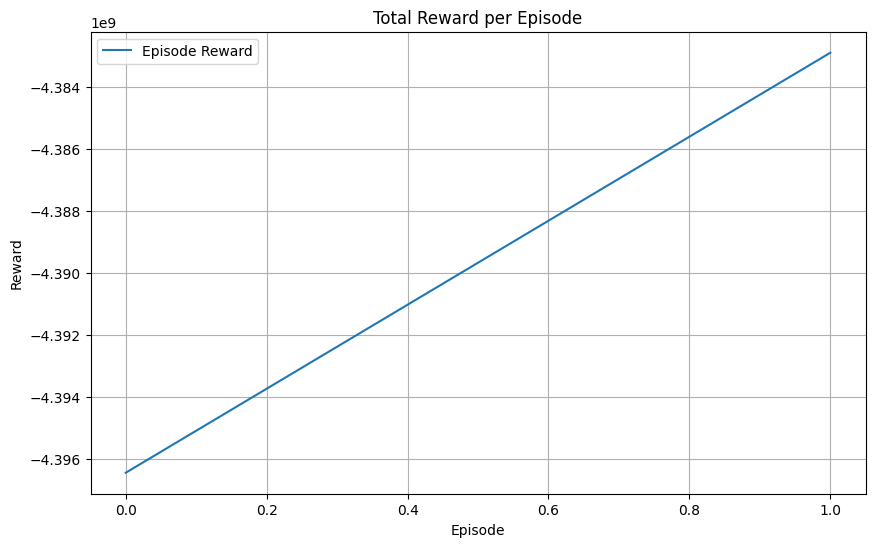

In [ ]:
import matplotlib.pyplot as plt
best_result = results.get_best_result().metrics
episode_reward = best_result['env_runners']['hist_stats']['episode_reward']
episodes = list(range(len(episode_reward)))
plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_reward, linestyle='-', label='Episode Reward')
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import os
import pandas as pd

results_dir = '/home/AD/user/lab/bmstestbedc2f2/packages/bmstestbedc2f2_notebooks/results'
csv_files = [f for f in os.listdir(results_dir) if f.endswith('.csv')]

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 指定 CSV 文件所在目录（每个 CSV 对应一个房间）
results_dir = '/home/AD/user/lab/bmstestbedc2f2/packages/bmstestbedc2f2_notebooks/results'
csv_files = [f for f in os.listdir(results_dir) if f.endswith('.csv')]

for csv_file in csv_files:
    room_id = os.path.splitext(csv_file)[0]
    file_path = os.path.join(results_dir, csv_file)
    df = pd.read_csv(file_path)
    df['time'] = pd.to_datetime(df['time'],format='mixed')
    # ---------------------------
    # 第一张图：Reward vs Time
    plt.figure(figsize=(14, 8))
    plt.plot(df['time'], df['reward'], label='Reward', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.title(f'{room_id}: Reward vs Time')
    plt.grid(True)
    # 保存 Reward 图
    reward_fig_path = os.path.join(results_dir, f'{room_id}_reward.jpg')
    plt.savefig(reward_fig_path, dpi=600)
    plt.close()  # 关闭当前图形，释放内存
    
    # ---------------------------
    # 第二张图：温度数据 vs Time
    plt.figure(figsize=(14, 8))
    plt.plot(df['time'], df['temperature:thermostat'], label='Temperature: Thermostat', color='red')
    plt.plot(df['time'], df['temperature:userpref'], label='Temperature: User Preference', color='green')
    plt.plot(df['time'], df['temperature'], label='Temperature', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title(f'{room_id}: Temperature vs Time')
    plt.legend()
    plt.grid(True)
    # 保存温度图
    temp_fig_path = os.path.join(results_dir, f'{room_id}_temperature.jpg')
    plt.savefig(temp_fig_path, dpi=600)
    plt.close()
    
    # ---------------------------
    # 第三张图：Load AHU vs Time
    plt.figure(figsize=(14, 8))
    plt.plot(df['time'], df['load_ahu'], label='Load AHU', color='purple')
    plt.xlabel('Time')
    plt.ylabel('Load AHU')
    plt.title(f'{room_id}: Load AHU vs Time')
    plt.grid(True)
    load_fig_path = os.path.join(results_dir, f'{room_id}_load_ahu.jpg')
    plt.savefig(load_fig_path, dpi=600)
    plt.close()
    
    print(f'Processed {room_id}: saved Reward, Temperature and Load AHU plots.')


Processed ART-01-10: saved Reward, Temperature and Load AHU plots.
Processed ART-01-13: saved Reward, Temperature and Load AHU plots.
Processed ART-01-07: saved Reward, Temperature and Load AHU plots.
Processed ART-01-11a: saved Reward, Temperature and Load AHU plots.
Processed ART-01-14: saved Reward, Temperature and Load AHU plots.
Processed ART-01-08: saved Reward, Temperature and Load AHU plots.
Processed ART-01-12: saved Reward, Temperature and Load AHU plots.
Processed ART-01-09: saved Reward, Temperature and Load AHU plots.
